# Predicting players rating

In this project, we are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset that we are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer)

We will be building two different models using Linear and Random Forest regression techniques, and evalaute those models using to judge their accuracy and efficiency.

In [1]:
import sqlite3
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from math import sqrt
from matplotlib import pyplot as plt
import seaborn as sns
# allow plots to appear directly in the notebook
%matplotlib inline

Create the connection and load the data into a pd dataframe.

In [2]:
cnx = sqlite3.connect('players-database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [46]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,...,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000
mean,68.676953,73.509507,55.212765,50.046700,57.263990,62.539477,49.575072,59.364533,53.095667,49.430479,...,57.891353,54.946875,46.726746,50.338635,48.022228,14.702223,15.890153,20.288688,15.960732,16.271845
std,7.031121,6.584915,17.251871,19.028715,16.484608,14.175661,18.255857,17.737113,18.255974,17.821167,...,15.155479,15.549558,21.235230,21.512153,21.610660,16.839847,15.839940,20.978388,16.067850,17.192270
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [4]:
df.shape

(183978, 42)

# Data Clean-up

In [5]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

836 records which have "overall_rating" as null have null values in all the columns. We can safely drop them.

In [6]:
df = df[~df.overall_rating.isnull()]

In [7]:
#check again for null values 

df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate     True
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                 True
dribbling              False
curve                   True
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                 True
reactions              False
balance                 True
shot_power             False
jumping                 True
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                  True
penalties              False
marking       

In [8]:
# replace NANs with series means

df["volleys"].fillna(df["volleys"].mean(),inplace=True)
df["curve"].fillna(df["curve"].mean(),inplace=True)
df["agility"].fillna(df["agility"].mean(),inplace=True)
df["balance"].fillna(df["balance"].mean(),inplace=True)
df["jumping"].fillna(df["jumping"].mean(),inplace=True)
df["vision"].fillna(df["vision"].mean(),inplace=True)
df["sliding_tackle"].fillna(df["sliding_tackle"].mean(),inplace=True)

Clean up values in defensive_work_rate and attacking_work_rate columns 

In [9]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

Converting defensive_work_rate is tricky. The acceptable values are high, medium and low, but the column has lot of other values which don't make sense. And since we don't have the metadata available for the column, the safest choice would be to drop all the rows having non-sensical values. But before we do that, lets try to make sense of the given data.

Few rows have numerical values ranging from 0-9. For them, we can assume that 0-3 means "low", 4-6 means "medium", 7-9 means high. Three other values "o", "_0" and "ormal" can be interpreted as "0", "0" and "normal" which can in turn be interpreted as "low", "low" and "medium". Rest of the rows can be dropped.

In [10]:
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('_0','0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('ormal','5')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('o','0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('l0w','low')

df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('0','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('1','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('2','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('3','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('4','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('5','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('6','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('7','high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('8','high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('9','high')

Choose only the rows having work rate as low, medium and high

In [11]:
df = df[(df.defensive_work_rate == 'medium') | (df.defensive_work_rate == 'high') | (df.defensive_work_rate == 'low')]

In [12]:
df.defensive_work_rate.value_counts()

medium    131741
high       27488
low        23614
Name: defensive_work_rate, dtype: int64

# attacking_work_rate

In [13]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
Name: attacking_work_rate, dtype: int64

Converting attacking_work_rate is again tricky. The acceptable values are high, medium and low, but the column has other values which don't make much sense. And since we don't have the metadata available for this column, the safest choice would be to drop all the rows having values other than low, high and medium.

In [14]:
# Change "norm" to "medium" and drop the rest having "None" and "Null" values.

df['attacking_work_rate'] = df['attacking_work_rate'].str.replace('norm','medium')
df = df[(df.attacking_work_rate == 'medium') | (df.attacking_work_rate == 'high') | (df.attacking_work_rate == 'low')]

Drop the columns that we wont be using

In [ ]:
df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis=1, inplace=True)

Dummify the catergorical columns and normalize the numeric columns

In [17]:
df_category = df[['attacking_work_rate','defensive_work_rate', 'preferred_foot']]
 
df_numeric = df[np.setdiff1d(df.columns.tolist(), df_category.columns.tolist())]

In [18]:
df_category_dummified = pd.get_dummies(df_category, columns=['attacking_work_rate','defensive_work_rate', 'preferred_foot'])

In [19]:
cols_to_norm = df_numeric.columns.tolist()

df_numeric[cols_to_norm] = df_numeric[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
df_modified = pd.concat([df_category_dummified, df_numeric], axis=1) 

In [21]:
df_modified.columns

Index(['attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium',
       'preferred_foot_left', 'preferred_foot_right', 'acceleration',
       'aggression', 'agility', 'balance', 'ball_control', 'crossing', 'curve',
       'dribbling', 'finishing', 'free_kick_accuracy', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'heading_accuracy', 'interceptions', 'jumping', 'long_passing',
       'long_shots', 'marking', 'overall_rating', 'penalties', 'positioning',
       'potential', 'reactions', 'short_passing', 'shot_power',
       'sliding_tackle', 'sprint_speed', 'stamina', 'standing_tackle',
       'strength', 'vision', 'volleys'],
      dtype='object')

The columns that we will be making predictions with.

In [23]:
X = df_modified[['potential', 'preferred_foot_left', 'preferred_foot_right', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle',
       'attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium']]

The column that we want to predict.

In [24]:
y = df_modified["overall_rating"]

# Linear regression

Evaluate the model by splitting into train and test sets.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted
print ("Test Accuracy:", round(metrics.r2_score(y_test, predicted) * 100, 2), '%')
print ("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))

Test Accuracy: 79.29 %
Mean Squared Error: 0.0027657257983778115


Evaluate the model using 10-fold cross-validation

In [26]:
scores = cross_val_score(LinearRegression(), X, y, cv=10)
scores, scores.mean()

(array([0.80033059, 0.7976755 , 0.78623793, 0.78128898, 0.78732932,
        0.77604425, 0.81277596, 0.78589619, 0.78631669, 0.79532529]),
 0.7909220676348424)

Accuracy still at 79%

PLOT true vs predicted scores and draw the line of fit

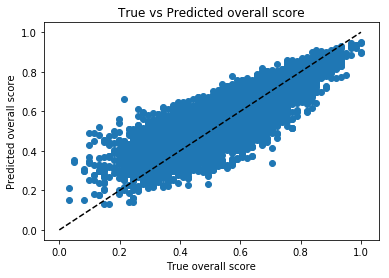

In [27]:
plt.scatter(y_test, predicted)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel("True overall score")
plt.ylabel("Predicted overall score")
plt.title("True vs Predicted overall score")
plt.show()

Draw residual plot. If the data points are scattered randomly around the line, then our model is correct 
and it's not missing the relationship between any two features.

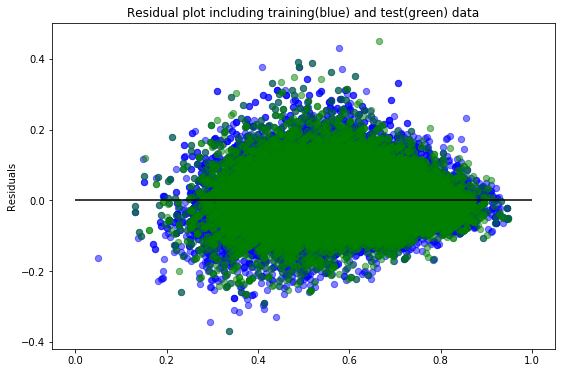

In [28]:
plt.figure(figsize=(9,6))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1)
plt.ylabel('Residuals')
plt.title('Residual plot including training(blue) and test(green) data')
plt.show()

# Random Forests 

Evaluate the model by splitting into train and test sets.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
predicted = model.predict(X_test)
print ("Test Accuracy:", round(metrics.r2_score(y_test, predicted) * 100, 2), '%')
print ("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))

Test Accuracy: 97.2 %
Mean Squared Error: 0.00037454413975296846


Perform GridSerach and then use the best estimator for scoring on the test set.

In [31]:
param_test1 = {
 'max_features': ["auto", "sqrt", "log2"],   
 'max_depth': [None, 5, 10],   
 'n_estimators': range(10, 50, 100),
 'min_samples_split': [2, 3, 5],
 'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(model, param_grid=param_test1, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  6.5min finished


Best: 0.965675 using {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [43]:
predicted = grid_result.predict(X_test)
print ("Test Accuracy:", round(metrics.r2_score(y_test, predicted) * 100, 2), '%')
print ("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))

Test Accuracy: 97.4 %
Mean Squared Error: 0.000347267458627842


Accuracy has increased slightly, by 0.2%

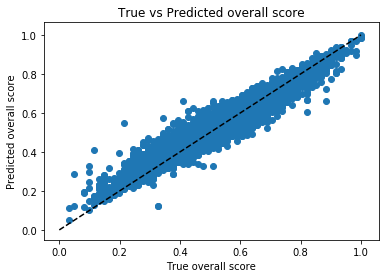

In [44]:
plt.scatter(y_test, predicted)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel("True overall score")
plt.ylabel("Predicted overall score")
plt.title("True vs Predicted overall score")
plt.show()

Random Forest has lower MSE and higher accuracy score than Linear Regression as far as this data-set is concerned.